<a href="https://colab.research.google.com/github/rsonar821/Classification-Capstone-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors.

In [1]:
# Importing Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Libraries for data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# Importing Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

# Importing metrics for model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_auc_score, classification_report

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv").drop('id', axis=1)

# **Data Understanding and Analysis**

In [4]:
# Printing the first 5 rows of the dataset

df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Printing the last 5 rows of the dataset

df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Checking the shape of the dataset

df.shape

(3390, 16)

In [7]:
# Printing the names of the column of the dataset

df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data Description**
**Demographic:**
* **sex**: Male or Female("M" or "F")
* **age**: Age of the patient (Continuous: Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **education**: Education level of a person

**Behavioral:**
* **is_smoking**: Whether or not the patient is a current smoker ("YES" or "NO")
* **cigsPerDay**: The number of cigarettes that the person smoked on an average in one day.(Can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (History):**
* **BPMeds**: Whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: Whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: Whether or not the patient was hypertensive (Nominal)
* **diabetes**: Whether or not the patient had diabetes (Nominal)

**Medical (Current):**
* **totChol**: Total Cholesterol Level (Continuous)
* **sysBP**: Systolic Blood Pressure (Continuous)
* **diaBP**: Diastolic Blood Pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate**: Heart Rate (Continuous: In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **glucose**: Glucose Level (Continuous)

**Predict Variable (Desired Target)**
* **TenYearCHD**: 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [8]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [9]:
# Checking the total null values in each column

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
# Examining the statistical description of the dataset

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### **Imputing Missing Values**

In [11]:
# Checking whether the peopple with null values of 'cigsPerDay' column smoking or not

df[df['cigsPerDay'].isnull()]['is_smoking']=='YES'

422     True
466     True
469     True
491     True
538     True
767     True
1461    True
1467    True
1597    True
1986    True
2031    True
2087    True
2240    True
2284    True
2527    True
2638    True
2648    True
2723    True
2879    True
2945    True
3301    True
3378    True
Name: is_smoking, dtype: bool

'cigsPerDay' column having NaN values show 'YES' for 'is_smoking', so the 'cigsPerDay' column NaN values can not be replaced with the median as it is 0, so replacing the NaN values with the mean 

In [12]:
# Imputing the null values with the mean of the column

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

The mean and the median values of the rest columns is almost the same so imputing the null values of the these columns with the mean or median is ok

In [13]:
# Imputing the null values of all the other columns with the median of the column

df['education'] = df['education'].fillna(df['education'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [14]:
# Changing the datatype of the columns from float to int 

df['education'] = df['education'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)

In [15]:
# Checking the null values in each column after imputing

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
# Checking the basic information of the updated dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   int64  
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   int64  
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 423.9+ KB


In [17]:
# Checking the statistical description of the updated dataset 

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.971681,NaN,NaN,9.069477,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.005925,NaN,NaN,11.840458,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


**Continuous Variables:**

* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

**Categorical Vaiables:**
* sex
* education
* is_smoking
* BPMeds
* prevalentStroke
* prevalentHyp
* diabetes
* TenYearCHD (Target Variable)





## **Exploratory Data Analysis**

In [18]:
# Checking the unique values of each column

columns = df.columns
for column in columns:
  print(column, '\n')
  print(df[column].unique())
  print("---"*50, '\n')

age 

[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

education 

[2 4 1 3]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

sex 

['F' 'M']
------------------------------------------------------------------------------------------------------------------------------------------------------ 

is_smoking 

['YES' 'NO']
------------------------------------------------------------------------------------------------------------------------------------------------------ 

cigsPerDay 

[ 3.          0.         10.         20.         30.         35.
 40.         15.          9.         60.         17.         25.
  5.         43.          7.         50.         19.   

In [19]:
# Creating 2 lists of continuous and categorical variables

continuous_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_variables = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [20]:
# Checking the percentage of the data of various categories of the categorical variables 

for variables in categorical_variables:
  print(variables)
  print(df[variables].value_counts(normalize=True)*100)
  print('---'*50, '\n')

sex
F    56.725664
M    43.274336
Name: sex, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

education
1    41.032448
2    31.769912
3    16.194690
4    11.002950
Name: education, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

is_smoking
NO     50.235988
YES    49.764012
Name: is_smoking, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

BPMeds
0    97.050147
1     2.949853
Name: BPMeds, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------ 

prevalentStroke
0    99.351032
1     0.648968
Name: prevalentStroke, dtype: float6

### **Univariate Analysis**

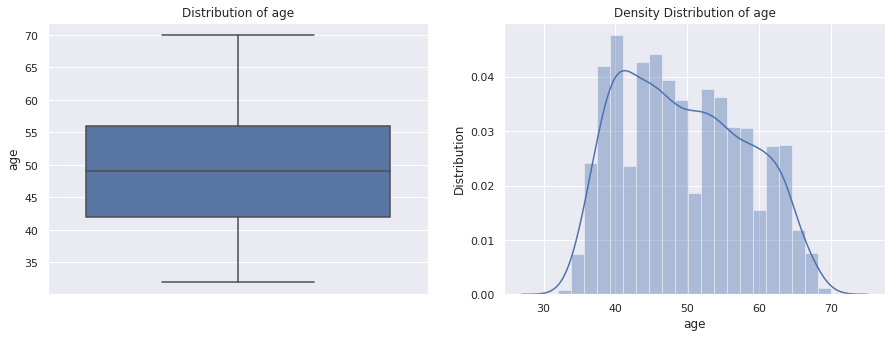

------------------------------------------------------------------------------------------------------------------------------------------------------


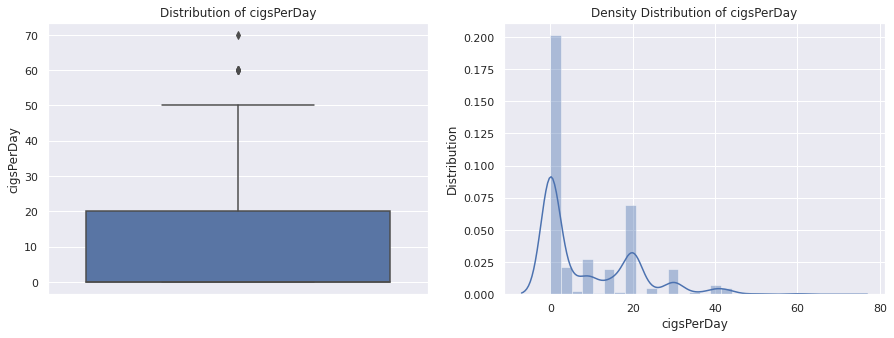

------------------------------------------------------------------------------------------------------------------------------------------------------


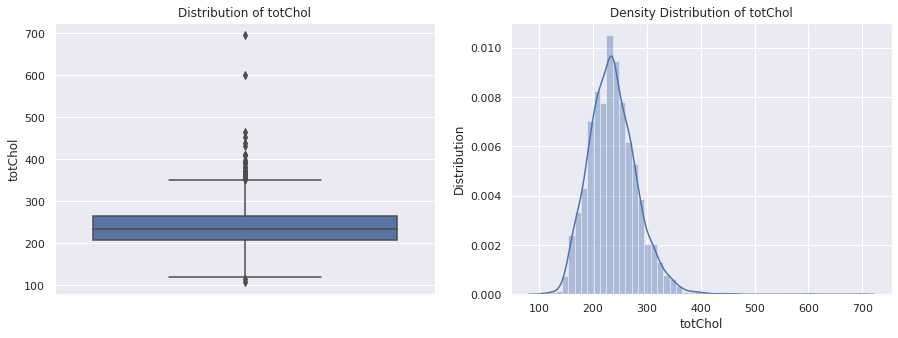

------------------------------------------------------------------------------------------------------------------------------------------------------


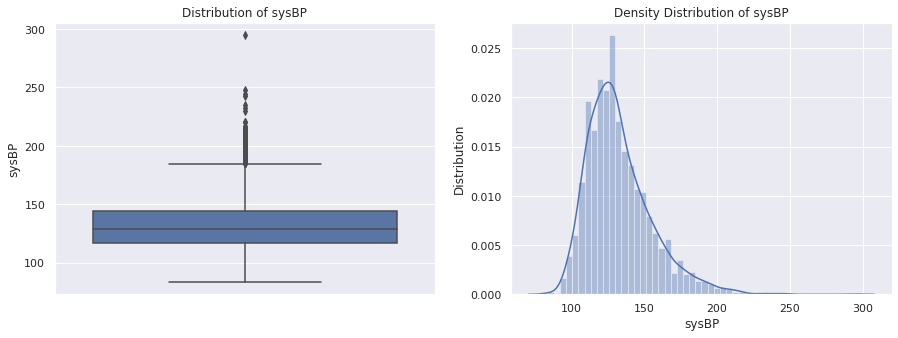

------------------------------------------------------------------------------------------------------------------------------------------------------


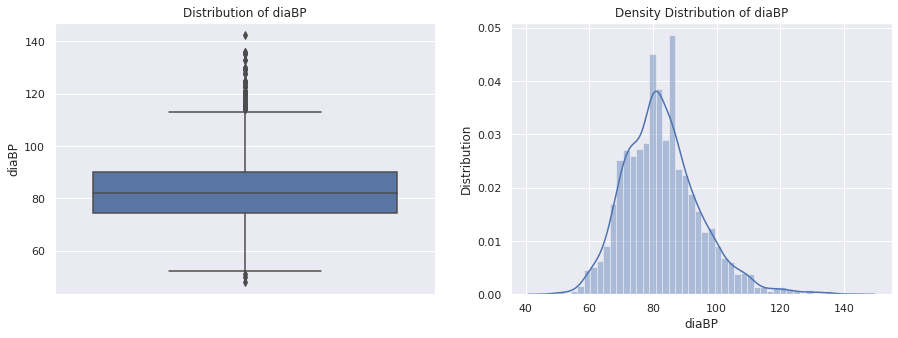

------------------------------------------------------------------------------------------------------------------------------------------------------


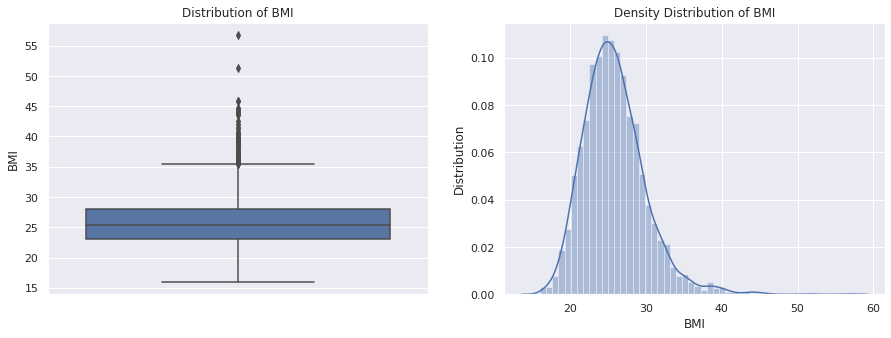

------------------------------------------------------------------------------------------------------------------------------------------------------


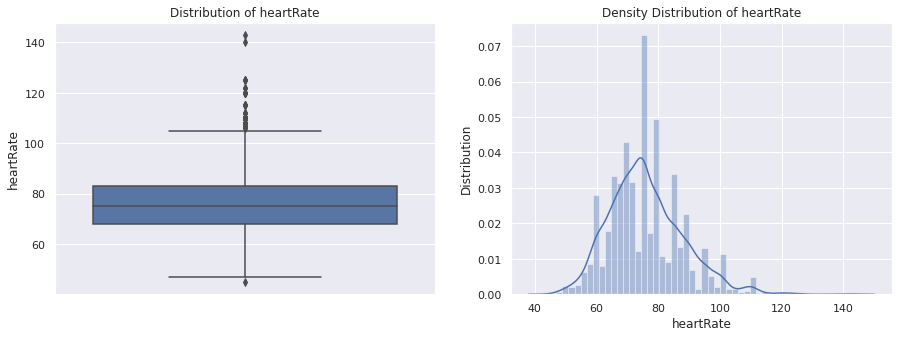

------------------------------------------------------------------------------------------------------------------------------------------------------


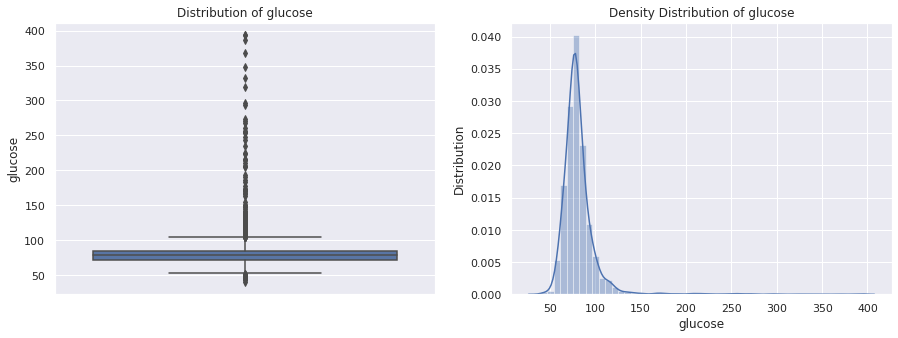

------------------------------------------------------------------------------------------------------------------------------------------------------


In [21]:
# Plotting the boxplot of the continuous variables

for variables in continuous_variables:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    figure = sns.boxplot(y = df[variables])
    figure.set(title = f'Distribution of {variables}')
    figure.set(ylabel= variables)
    
# Plotting the density distribution of the continuous variables

    plt.subplot(1, 2, 2)
    figure = sns.distplot(df[variables])
    figure.set(title = f'Density Distribution of {variables}')
    figure.set(xlabel=variables, ylabel= 'Distribution')

    plt.show()
    print('---'*50)

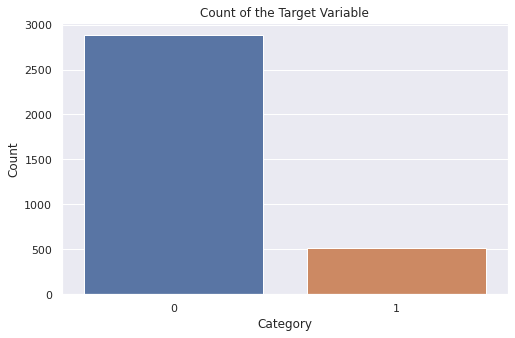

In [22]:
# Plotting a countplot of the target variable (TenYearCHD)

plt.figure(figsize=(8,5))
figure = sns.countplot(x=df['TenYearCHD'])
figure.set(title='Count of the Target Variable')
figure.set(xlabel='Category', ylabel='Count')
plt.show(figure)

### **Bivariate Analysis**

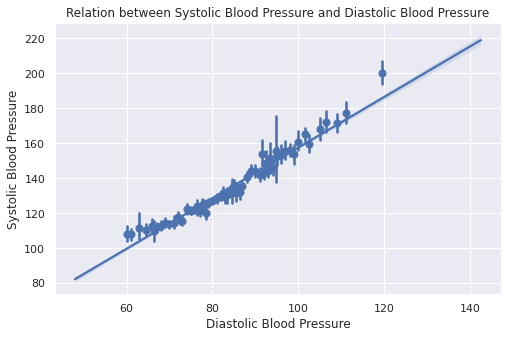

In [23]:
# Plotting a regression plot between sysBP and diaBP

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['diaBP'], y=df['sysBP'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Systolic Blood Pressure and Diastolic Blood Pressure')
figure.set(xlabel='Diastolic Blood Pressure', ylabel='Systolic Blood Pressure')
plt.show(figure)

systolic Blood Pressure and diastolic Blood Pressure always show a linear relationship, so anyone out of the 2 can be neglected for the analysis as it would show the same relation with the other variables 

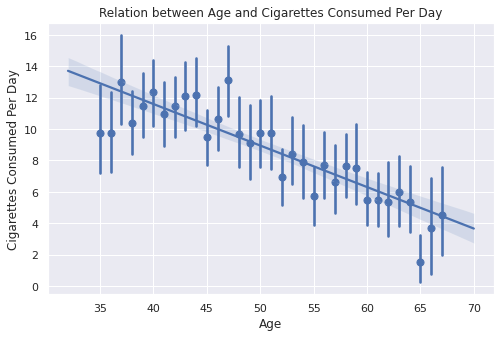

In [24]:
# Plotting a regression plot between age and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['age'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Age and Cigarettes Consumed Per Day')
figure.set(xlabel='Age', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

The numbers of cigarettes consumed per day decreases as the age increases

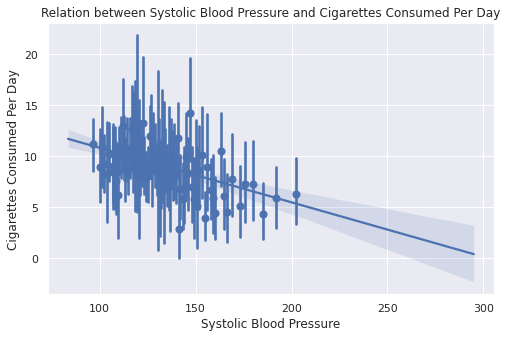

In [25]:
# Plotting a regression plot between sysBP and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['sysBP'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Systolic Blood Pressure and Cigarettes Consumed Per Day')
figure.set(xlabel='Systolic Blood Pressure', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Systolic Blood Pressure decreases as the cigarettes consumed per day increases

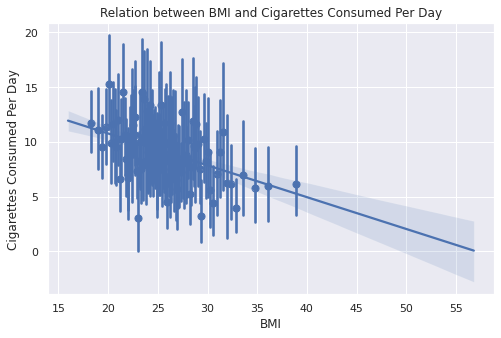

In [26]:
# Plotting a regression plot between BMI and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['BMI'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between BMI and Cigarettes Consumed Per Day')
figure.set(xlabel='BMI', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

BMI decreases as the cigarettes consumed per day increases

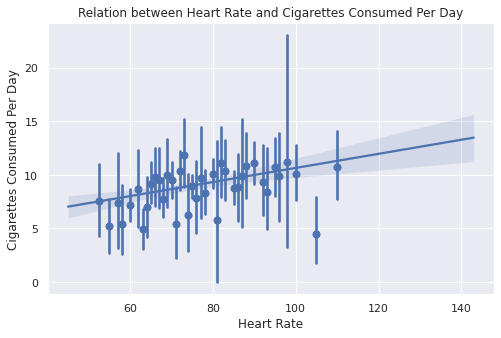

In [27]:
# Plotting a regression plot between heartRate and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['heartRate'], y=df['cigsPerDay'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Heart Rate and Cigarettes Consumed Per Day')
figure.set(xlabel='Heart Rate', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Heart Rate increases as the cigarettes consumed per day increases

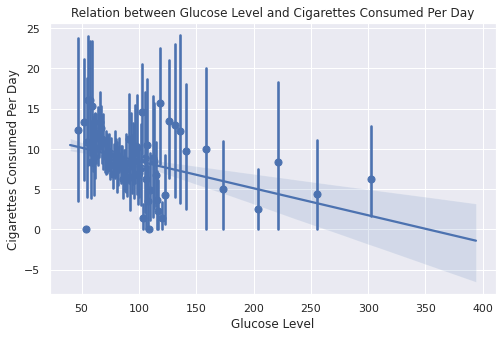

In [28]:
# Plotting a regression plot between glucose and cigsPerDay

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['glucose'], y=df['cigsPerDay'], x_bins=500, fit_reg=True)
figure.set(title='Relation between Glucose Level and Cigarettes Consumed Per Day')
figure.set(xlabel='Glucose Level', ylabel='Cigarettes Consumed Per Day')
plt.show(figure)

Not such a good relation but can be seen that glucose level decreases as the cigarettes consumed per day increases

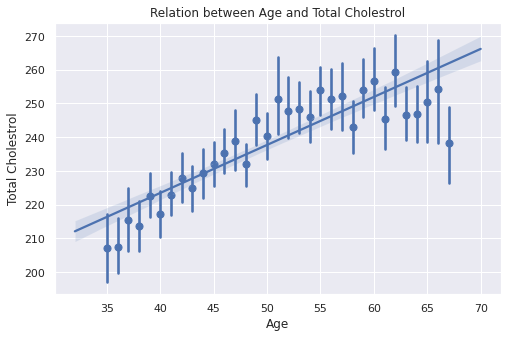

In [29]:
# Plotting a regression plot between age and totChol

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['age'], y=df['totChol'], x_bins=100, fit_reg=True)
figure.set(title='Relation between Age and Total Cholestrol')
figure.set(xlabel='Age', ylabel='Total Cholestrol')
plt.show(figure)

As the age increases the total cholestrol of the body also increases

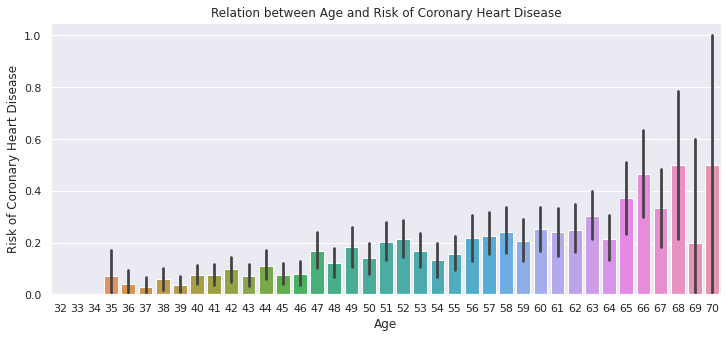

In [30]:
# Plotting a barplot between age and TenYearCHD

plt.figure(figsize=(12,5))
figure = sns.barplot(x=df['age'], y=df['TenYearCHD'])
figure.set(title='Relation between Age and Risk of Coronary Heart Disease')
figure.set(xlabel='Age', ylabel='Risk of Coronary Heart Disease')
plt.show(figure)

As the age increases the risk of getting a coronary heart disease increases not such significantly but by a small ratio

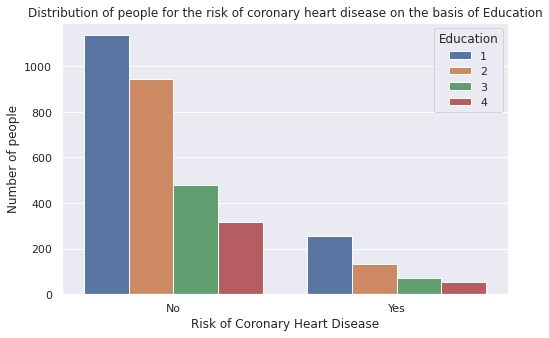

In [31]:
# Creating a dataframe for the value counts of 'education' on the basis of 'TenYearCHD'

education_df = pd.DataFrame(df.groupby('TenYearCHD')['education'].value_counts())
education_df.rename(columns={'education':'count'}, inplace=True)
education_df.reset_index(inplace=True)
education_df.sort_values(['TenYearCHD','education'], ascending=[True,True], inplace=True)


# Plotting a barplot of the people at the risk of coronary heart disease on the basis of education

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='education', data=education_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Education')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Education')
plt.show(figure)

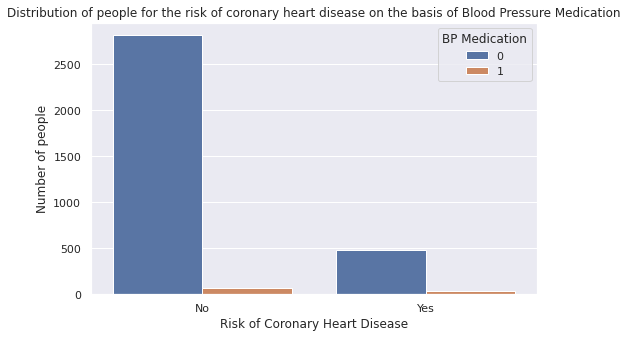

In [32]:
# Creating a dataframe for the value counts of 'BPMeds' on the basis of 'TenYearCHD'

bpmed_df = pd.DataFrame(df.groupby('TenYearCHD')['BPMeds'].value_counts())
bpmed_df.rename(columns={'BPMeds':'count'}, inplace=True)
bpmed_df.reset_index(inplace=True)
bpmed_df.sort_values(['TenYearCHD','BPMeds'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of BPMeds

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='BPMeds', data=bpmed_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Blood Pressure Medication')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='BP Medication')
plt.show(figure)

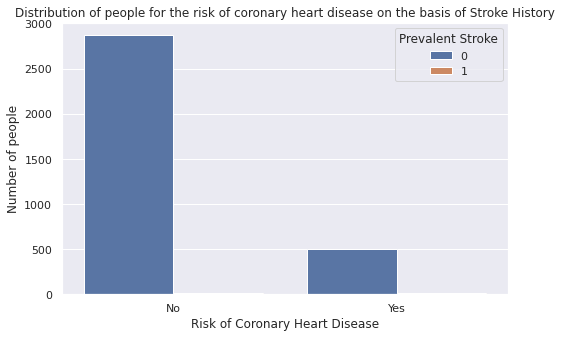

In [33]:
# Creating a dataframe for the value counts of 'prevalentStroke' on the basis of 'TenYearCHD'

prevalent_stroke_df = pd.DataFrame(df.groupby('TenYearCHD')['prevalentStroke'].value_counts())
prevalent_stroke_df.rename(columns={'prevalentStroke':'count'}, inplace=True)
prevalent_stroke_df.reset_index(inplace=True)
prevalent_stroke_df.sort_values(['TenYearCHD','prevalentStroke'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of prevalentStroke

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='prevalentStroke', data=prevalent_stroke_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Stroke History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Prevalent Stroke')
plt.show(figure)

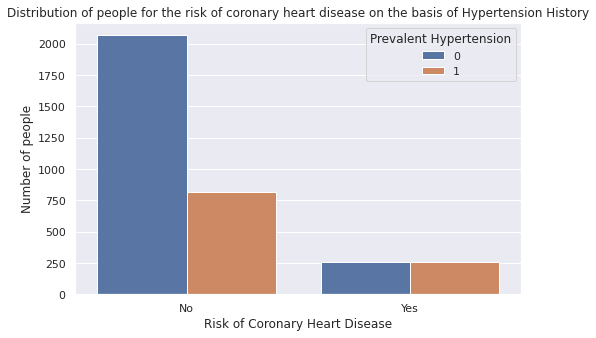

In [34]:
# Creating a dataframe for the value counts of 'prevalentHyp' on the basis of 'TenYearCHD'

prevalent_hyp_df = pd.DataFrame(df.groupby('TenYearCHD')['prevalentHyp'].value_counts())
prevalent_hyp_df.rename(columns={'prevalentHyp':'count'}, inplace=True)
prevalent_hyp_df.reset_index(inplace=True)
prevalent_hyp_df.sort_values(['TenYearCHD','prevalentHyp'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of prevalentHyp

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='prevalentHyp', data=prevalent_hyp_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Prevalent Hypertension')
plt.show(figure)

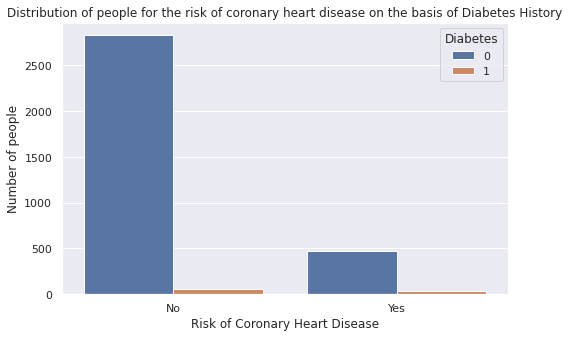

In [35]:
# Creating a dataframe for the value counts of 'diabetes' on the basis of 'TenYearCHD'

diabetes_df = pd.DataFrame(df.groupby('TenYearCHD')['diabetes'].value_counts())
diabetes_df.rename(columns={'diabetes':'count'}, inplace=True)
diabetes_df.reset_index(inplace=True)
diabetes_df.sort_values(['TenYearCHD','diabetes'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of diabetes

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='diabetes', data=diabetes_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Diabetes History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Diabetes')
plt.show(figure)

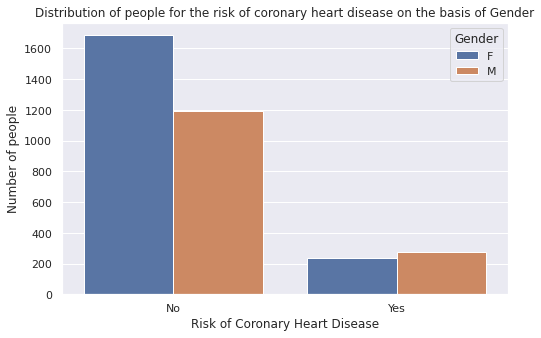

In [36]:
# Creating a dataframe for the value counts of 'sex' on the basis of 'TenYearCHD'

sex_df = pd.DataFrame(df.groupby('TenYearCHD')['sex'].value_counts())
sex_df.rename(columns={'sex':'count'}, inplace=True)
sex_df.reset_index(inplace=True)
sex_df.sort_values(['TenYearCHD','sex'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='sex', data=sex_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.show(figure)

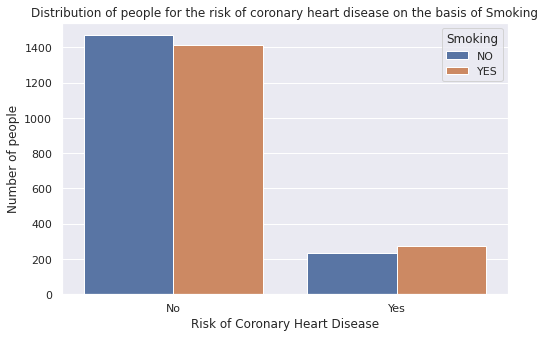

In [37]:
# Creating a dataframe for the value counts of 'is_smoking' on the basis of 'TenYearCHD'

is_smoking_df = pd.DataFrame(df.groupby('TenYearCHD')['is_smoking'].value_counts())
is_smoking_df.rename(columns={'is_smoking':'count'}, inplace=True)
is_smoking_df.reset_index(inplace=True)
is_smoking_df.sort_values(['TenYearCHD','is_smoking'], ascending=[True,True], inplace=True)

# Plotting a barplot of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(8,5))
figure = sns.barplot(x='TenYearCHD', y='count', hue='is_smoking', data=is_smoking_df)
figure.set(title='Distribution of people for the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Number of people')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.show(figure)

### **Multivariate Analysis**

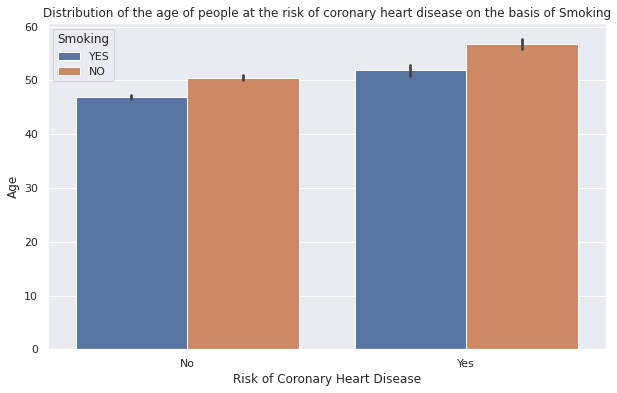

In [38]:
# Plotting a barplot of the age of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['is_smoking'])
figure.set(title='Distribution of the age of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Age')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.show(figure)

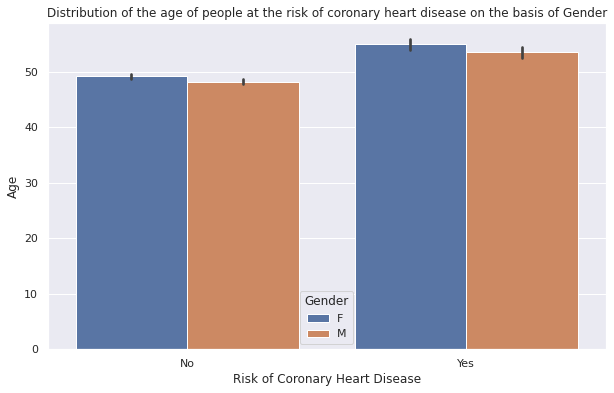

In [39]:
# Plotting a barplot of the age of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['sex'])
figure.set(title='Distribution of the age of people at the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Age')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.show(figure)

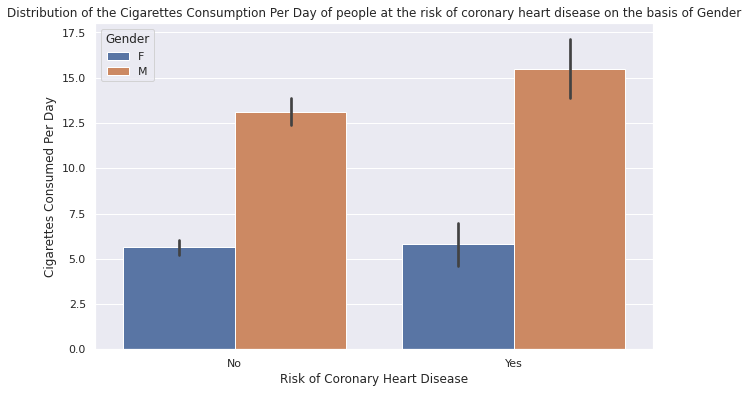

In [40]:
# Plotting a barplot of the 'cigsPerDay' of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['sex'])
figure.set(title='Distribution of the Cigarettes Consumption Per Day of people at the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Cigarettes Consumed Per Day')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.show(figure)

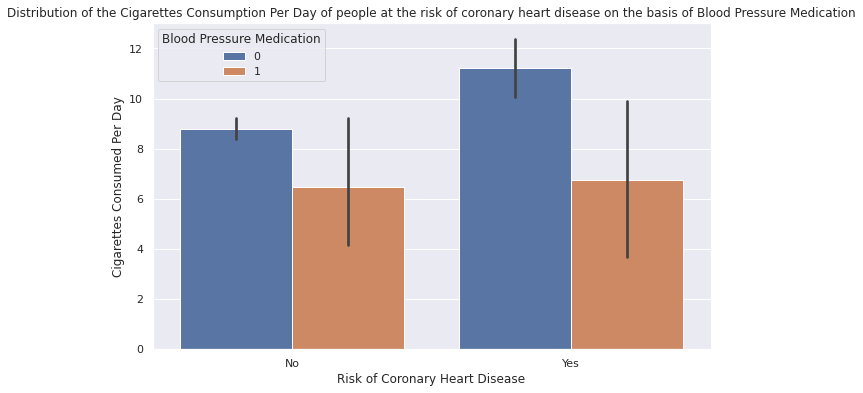

In [41]:
# Plotting a barplot of the 'cigsPerDay' of the people at the risk of coronary heart disease on the basis of BPMeds 

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['BPMeds'])
figure.set(title='Distribution of the Cigarettes Consumption Per Day of people at the risk of coronary heart disease on the basis of Blood Pressure Medication')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Cigarettes Consumed Per Day')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Blood Pressure Medication')
plt.show(figure)

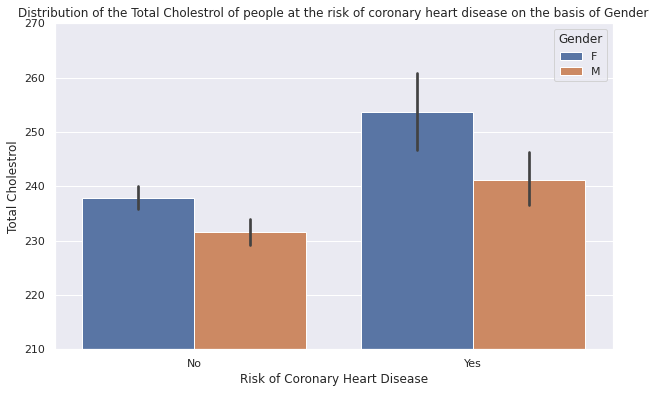

In [42]:
# Plotting a barplot of the 'totChol' of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['sex'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(210, 270)
plt.show(figure)

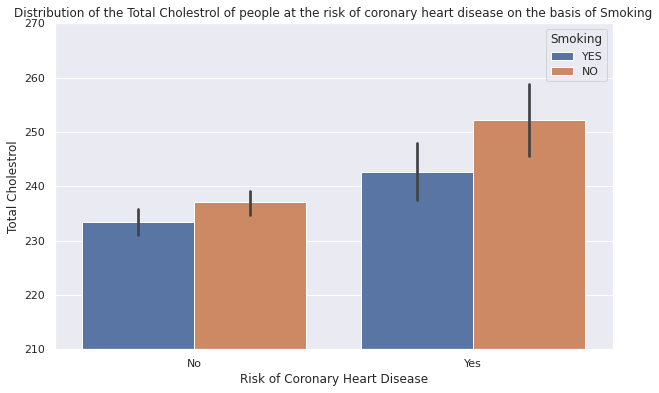

In [43]:
# Plotting a barplot of the 'totChol' of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['is_smoking'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(210, 270)
plt.show(figure)

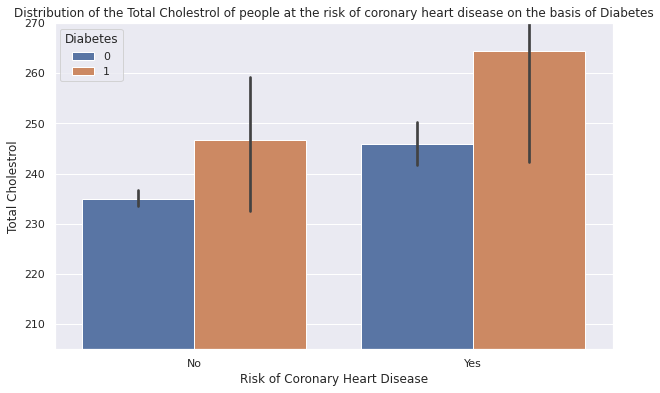

In [44]:
# Plotting a barplot of the 'totChol' of the people at the risk of coronary heart disease on the basis of diabetes

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['diabetes'])
figure.set(title='Distribution of the Total Cholestrol of people at the risk of coronary heart disease on the basis of Diabetes')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Total Cholestrol')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Diabetes')
plt.ylim(205, 270)
plt.show(figure)

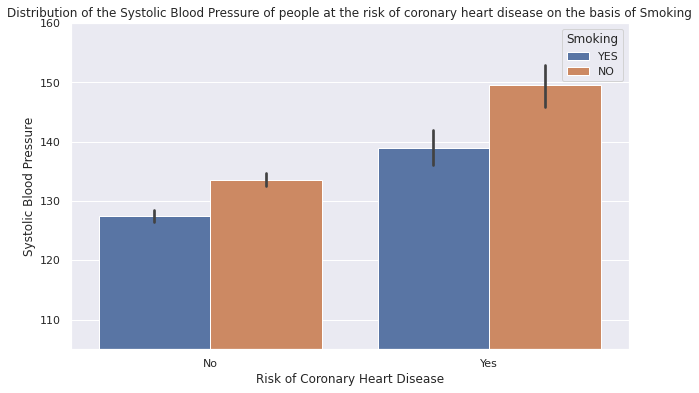

In [45]:
# Plotting a barplot of the 'sysBP' of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['is_smoking'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(105, 160)
plt.show(figure)

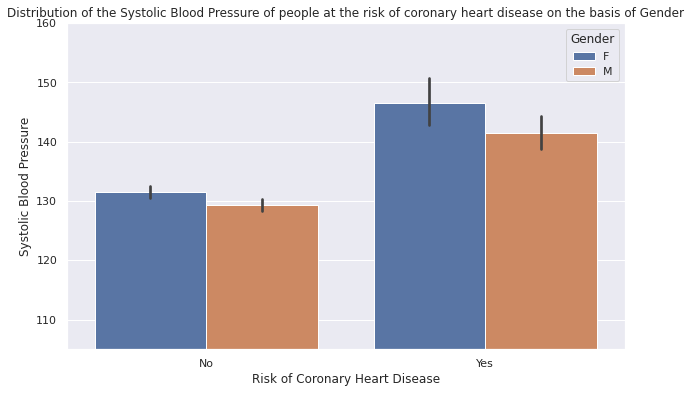

In [46]:
# Plotting a barplot of the 'sysBP' of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['sex'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(105, 160)
plt.show(figure)

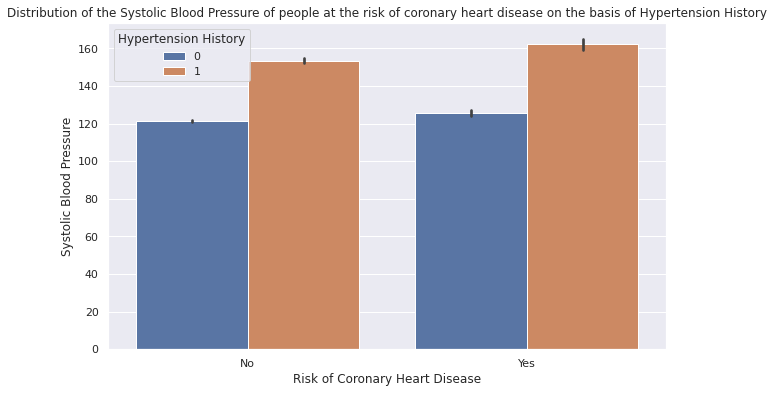

In [47]:
# Plotting a barplot of the 'sysBP' of the people at the risk of coronary heart disease on the basis of Prevalent Hypertension

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['prevalentHyp'])
figure.set(title='Distribution of the Systolic Blood Pressure of people at the risk of coronary heart disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Systolic Blood Pressure')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Hypertension History')
plt.show(figure)

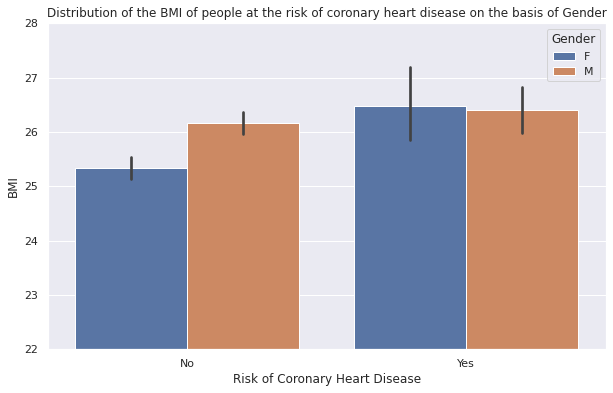

In [48]:
# Plotting a barplot of the 'BMI' of the people at the risk of coronary heart disease on the basis of gender

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['sex'])
figure.set(title='Distribution of the BMI of people at the risk of coronary heart disease on the basis of Gender')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Gender')
plt.ylim(22, 28)
plt.show(figure)

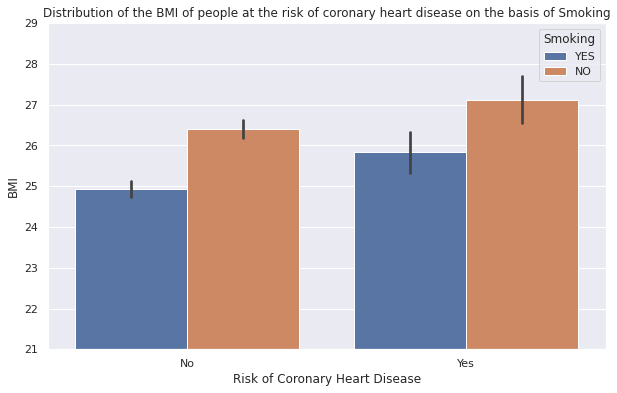

In [49]:
# Plotting a barplot of the 'BMI' of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['is_smoking'])
figure.set(title='Distribution of the BMI of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(21, 29)
plt.show(figure)

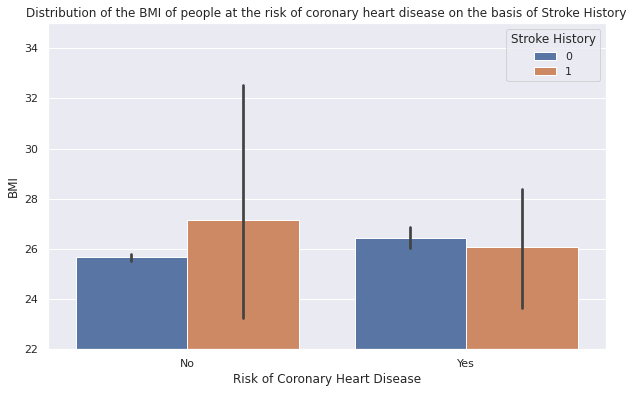

In [50]:
# Plotting a barplot of the 'BMI' of the people at the risk of coronary heart disease on the basis of prevalent stroke

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['BMI'], hue=df['prevalentStroke'])
figure.set(title='Distribution of the BMI of people at the risk of coronary heart disease on the basis of Stroke History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='BMI')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Stroke History')
plt.ylim(22, 35)
plt.show(figure)

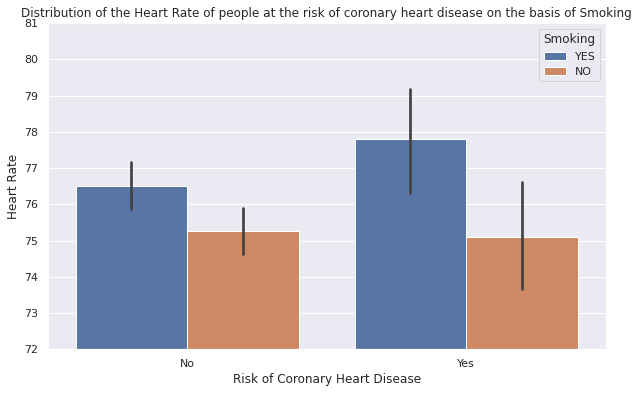

In [51]:
# Plotting a barplot of the 'heartRate' of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['is_smoking'])
figure.set(title='Distribution of the Heart Rate of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Heart Rate')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(72, 81)
plt.show(figure)

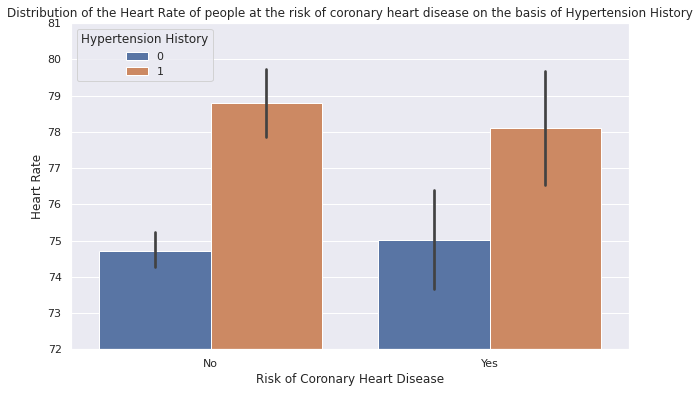

In [52]:
# Plotting a barplot of the 'heartRate' of the people at the risk of coronary heart disease on the basis of prevalent hypertension

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['prevalentHyp'])
figure.set(title='Distribution of the Heart Rate of people at the risk of coronary heart disease on the basis of Hypertension History')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Heart Rate')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Hypertension History')
plt.ylim(72, 81)
plt.show(figure)

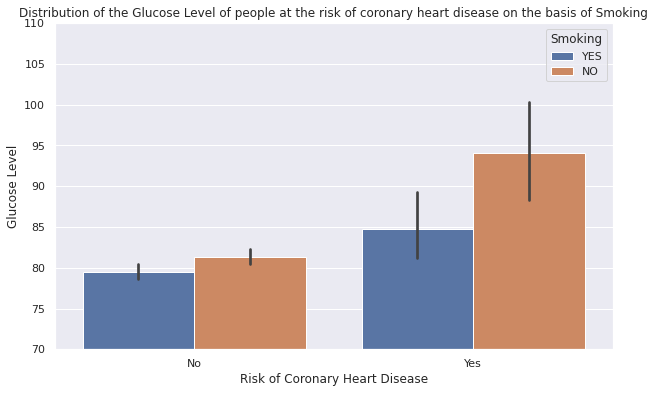

In [53]:
# Plotting a barplot of the 'glucose' of the people at the risk of coronary heart disease on the basis of smoking

plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['glucose'], hue=df['is_smoking'])
figure.set(title='Distribution of the Glucose Level of people at the risk of coronary heart disease on the basis of Smoking')
figure.set(xlabel='Risk of Coronary Heart Disease', ylabel='Glucose Level')
figure.set_xticklabels(['No', 'Yes'])
plt.legend(title='Smoking')
plt.ylim(70, 110)
plt.show(figure)

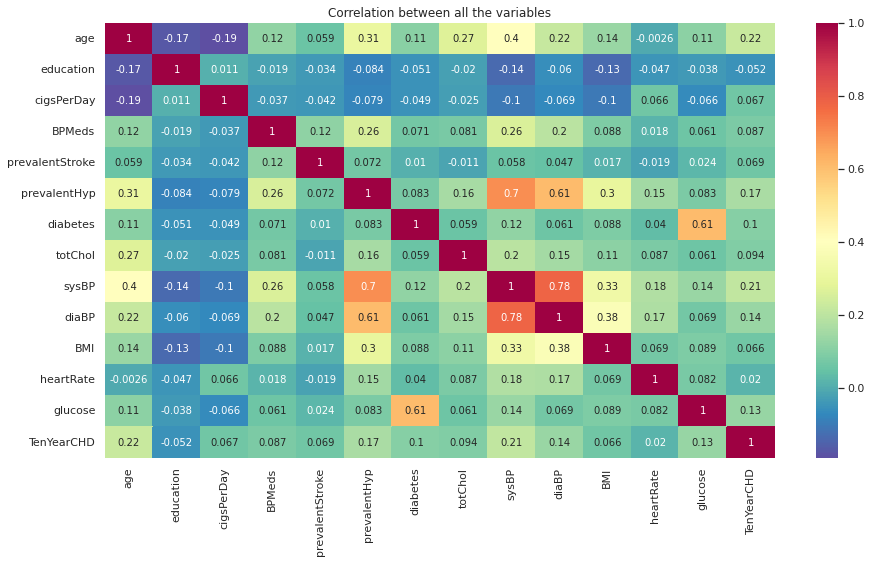

In [54]:
# Plotting a correlation matrix between all the variables to see the relation between each one of them

plt.figure(figsize=(15,8))
figure = sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')
figure.set(title='Correlation between all the variables')
plt.show(figure)

# **Modelling**

In [55]:
# Converting the string datatypes column to numerical for modelling

df = pd.get_dummies(df, columns=['sex', 'is_smoking'], drop_first=True)

In [56]:
# Selecting the dependent and independent variables for modelling

X = df.drop(['TenYearCHD', 'diabetes', 'prevalentStroke', 'BPMeds', 'diaBP'], axis=1)
Y = df['TenYearCHD']

In [57]:
# Checking the count of target variable

print(Y.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


In [58]:
# Using SMOTE for oversampling technique as the target variable is imbalanced

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, Y)

In [59]:
# Checking the length of original dataset and oversampled dataset 

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [60]:
# Checking the count of target variable after oversampling

print((y_smote).value_counts())

1    2879
0    2879
Name: TenYearCHD, dtype: int64


In [61]:
# Splitting the dataset into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 42)

In [62]:
# Scaling the train and test dataset for better accuracy

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## **Applying Algorithms**

In [63]:
# Storing all the algorithms in a list

models=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('XGB Classifier', XGBClassifier()))
models.append(('Support Vector Classifier', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

In [64]:
# Running all the algorithms in the loop with cross-validation to check the best ROC-AUC score

scores = {}
for name, model in models:
  score = np.mean(cross_val_score(model, X_train, Y_train, cv=10, scoring='roc_auc'))
  scores[name] = score

In [65]:
# Printing the values of the ROC-AUC score of all the algorithms

scores

{'BernoulliNB': 0.6803477287803473,
 'Decision Tree Classifier': 0.7811905920007151,
 'GaussianNB': 0.7086243464229565,
 'Gradient Boosting Classifier': 0.8916085659011059,
 'Logistic Regression': 0.7520351464074052,
 'Random Forest Classifier': 0.9437331238010321,
 'Support Vector Classifier': 0.815213882061542,
 'XGB Classifier': 0.8860171011720729}

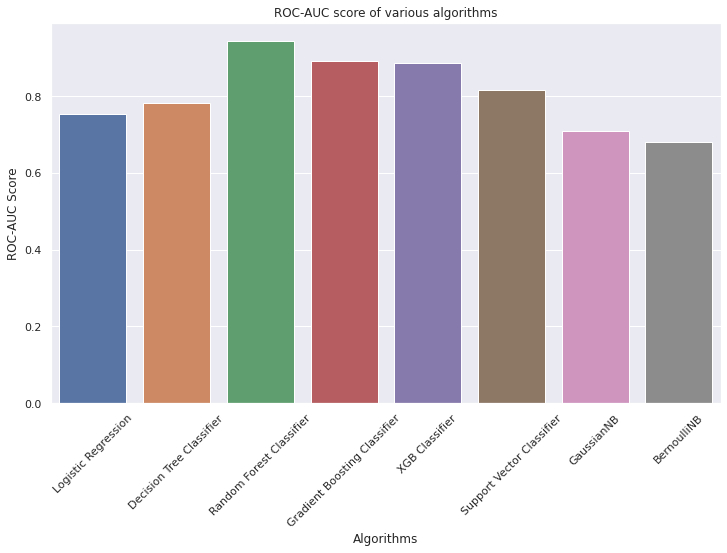

In [66]:
# Plotting a barplot of the ROC-AUC scores of all the algorithms

plt.figure(figsize=(12,7))
figure = sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xticks(rotation=45)
figure.set(title='ROC-AUC score of various algorithms')
figure.set(xlabel='Algorithms', ylabel='ROC-AUC Score')
plt.show(figure)

### **Hyper-Parameter Tuning using Random Forest Classifier**

In [67]:
# Initializing the Random Forest Classifier Model

rfc = RandomForestClassifier()

In [68]:
# Getting the parameters of the Random Forest Classifier

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Giving a range to the hyperparameters for selecting best parameters from them

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = range(2, 10)
min_samples_leaf = range(2, 10)
bootstrap = [True, False]

# Storing the hyperparameters in a dictionary
  
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
# Using Random Search CV for selecting the best parameters

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions = random_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

rfc_random.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.1s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.7s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.9s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.9s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.0s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.8s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.9s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=2)

In [71]:
# Getting the best parameters after the Random Search Cross Validation

rfc_random.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 1400}

In [72]:
# Initializing a Random Forest Classifier with the best parameters obtained

rf_model = RandomForestClassifier(bootstrap = False, max_depth = 110, min_samples_leaf = 2,
                                        min_samples_split = 7, n_estimators = 1400)

rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=1400)

In [73]:
# Getting the training predictions

rf_train_preds = rf_model.predict(X_train)

#Getting the testing predictions

rf_test_preds = rf_model.predict(X_test)

In [74]:
# Printing the training classification report of the model

print(classification_report(rf_train_preds, Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2146
           1       1.00      1.00      1.00      2172

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318



In [75]:
# Printing the testing classification report of the model

print(classification_report(rf_test_preds, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       724
           1       0.89      0.88      0.88       716

    accuracy                           0.88      1440
   macro avg       0.88      0.88      0.88      1440
weighted avg       0.88      0.88      0.88      1440



In [76]:
# Creating a DataFrame for storing the metrics of all the models

results_df = pd.DataFrame(columns=['model_name', 'train_accuracy', 'test_accuracy',
                                   'train_recall','test_recall','train_precision',
                                   'test_precision','train_ROC', 'test_ROC', 'train_f1',
                                   'test_f1'])

In [77]:
# Updating the results dataframe with the Random Forest Classifier metrics

results_df.loc[0,'model_name'] = 'Random Forest Classifier'
results_df.loc[0,'train_accuracy'] = round(accuracy_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_accuracy'] = round(accuracy_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_recall'] = round(recall_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_recall'] = round(recall_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_precision'] = round(precision_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_precision'] = round(precision_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_ROC'] = round(roc_auc_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_ROC'] = round(roc_auc_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_f1'] = round(f1_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_f1'] = round(f1_score(Y_test, rf_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

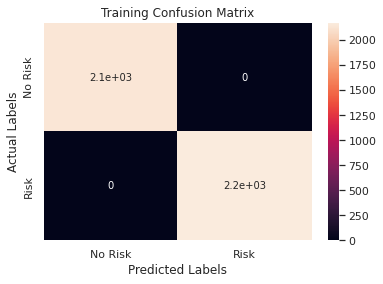

In [78]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_train, rf_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

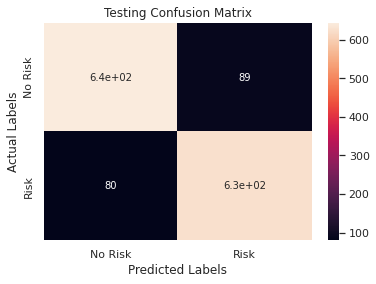

In [79]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_test, rf_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [80]:
# Installing shap

!pip install shap

In [81]:
# Importing shap for model interpretability

import shap

In [82]:
# Creating a dataframe for column names to be used in shap visualization

feature_columns = pd.DataFrame(X_test, columns=['age', 'education', 'cigsPerDay', 
                                                'prevalentHyp', 'totChol', 'sysBP', 'BMI',
                                                'heartRate', 'glucose', 'sex_M', 'is_smoking_YES'])

In [83]:
# Getting the Random Forest Classifier Model Interpretability using shap

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

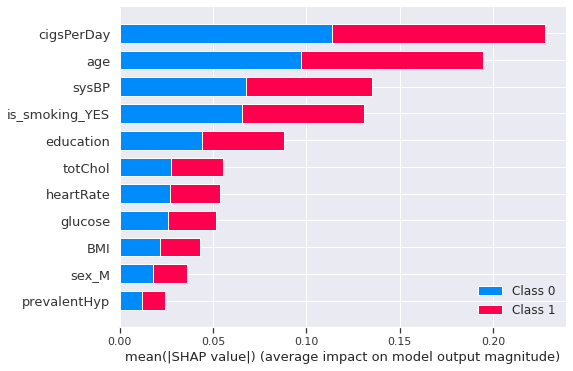

In [84]:
shap.summary_plot(shap_values_rf, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning using Gradient Boosting Classifier**

In [85]:
# Initializing the Gradient Boosting Classifier Model

gbc = GradientBoostingClassifier()

In [86]:
# Getting the parameters of the Gradient Boosting Classifier

gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
# Giving a range to the hyperparameters for selecting best parameters from them

learning_rate = [0.1, 0.01, 1, 10]
max_depth = range(3, 20)
max_features = ['auto']
max_leaf_nodes = range(3, 20)
min_samples_leaf = range(1, 10)
min_samples_split = range(1, 10)
n_estimators = range(100, 2000, 200)

# Storing the hyperparameters in a dictionary
  
gradient_grid = {'learning_rate': learning_rate,
                'max_depth': max_depth,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'n_estimators': n_estimators}

In [88]:
# Using Random Search CV for selecting the best parameters

gbc_random = RandomizedSearchCV(estimator=gbc, param_distributions = gradient_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

gbc_random.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1, n_estimators=1500; total ti

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_depth': range(3, 20),
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': range(3, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000, 200)},
                   scoring='roc_auc', verbose=2)

In [89]:
# Getting the best parameters after the Random Search Cross Validation

gbc_random.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 1900}

In [90]:
# Initializing a Gradient Boosting Classifier with the best parameters obtained

gbc_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, max_features = 'auto',
                                       max_leaf_nodes = 7, min_samples_leaf = 5, min_samples_split = 8,
                                       n_estimators = 1900)

gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=4, max_features='auto', max_leaf_nodes=7,
                           min_samples_leaf=5, min_samples_split=8,
                           n_estimators=1900)

In [91]:
# Getting the training predictions

gbc_train_preds = gbc_model.predict(X_train)

#Getting the testing predictions

gbc_test_preds = gbc_model.predict(X_test)

In [92]:
# Printing the training classification report of the model

print(classification_report(gbc_train_preds, Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2150
           1       1.00      1.00      1.00      2168

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318



In [93]:
# Printing the testing classification report of the model

print(classification_report(gbc_test_preds, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       760
           1       0.84      0.88      0.86       680

    accuracy                           0.87      1440
   macro avg       0.87      0.87      0.87      1440
weighted avg       0.87      0.87      0.87      1440



In [94]:
# Updating the results dataframe with the Gradient Boosting Classifier metrics

results_df.loc[1,'model_name'] = 'Gradient Boosting Classifier'
results_df.loc[1,'train_accuracy'] = round(accuracy_score(Y_train, gbc_train_preds),2)
results_df.loc[1,'test_accuracy'] = round(accuracy_score(Y_test, gbc_test_preds),2)
results_df.loc[1,'train_recall'] = round(recall_score(Y_train, gbc_train_preds),2)
results_df.loc[1,'test_recall'] = round(recall_score(Y_test, gbc_test_preds),2)
results_df.loc[1,'train_precision'] = round(precision_score(Y_train, gbc_train_preds),2)
results_df.loc[1,'test_precision'] = round(precision_score(Y_test, gbc_test_preds),2)
results_df.loc[1,'train_ROC'] = round(roc_auc_score(Y_train, gbc_train_preds),2)
results_df.loc[1,'test_ROC'] = round(roc_auc_score(Y_test, gbc_test_preds),2)
results_df.loc[1,'train_f1'] = round(f1_score(Y_train, gbc_train_preds),2)
results_df.loc[1,'test_f1'] = round(f1_score(Y_test, gbc_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

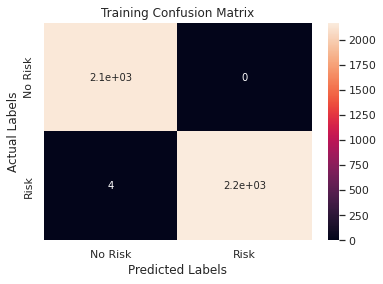

In [95]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_train, gbc_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

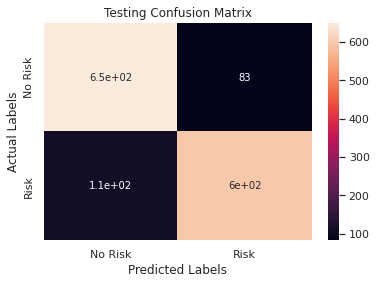

In [96]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_test, gbc_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [97]:
# Getting the Gradient Boosting Classifier Model Interpretability using shap

explainer_gbc = shap.TreeExplainer(gbc_model)
shap_values_gbc = explainer_gbc.shap_values(X_test)

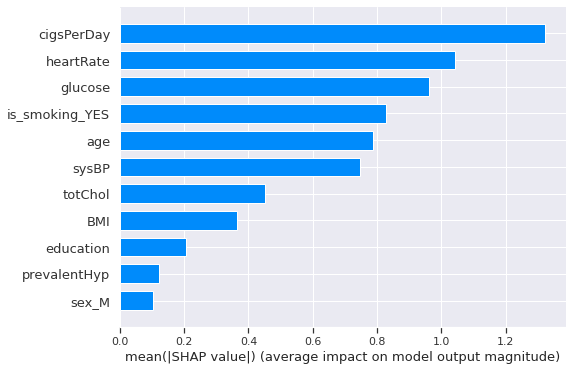

In [98]:
shap.summary_plot(shap_values_gbc, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning using XG Boost Classifier**

In [99]:
# Initializing the XG Boost Classifier Model

xgb = XGBClassifier()

In [100]:
# Getting the parameters of the XG Boost Classifier

xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [101]:
# Giving a range to the hyperparameters for selecting best parameters from them

gamma = range(0,5)
learning_rate = [0.1, 0.01, 1, 10]
max_delta_step = range(0, 10)
max_depth = range(3, 20)
min_child_weight = range(0,10)
n_estimators = range(100, 2000, 200)
n_jobs = range(1,5)
reg_alpha = range(0, 200, 20)
reg_lambda = range(1,5)

# Storing the hyperparameters in a dictionary
  
xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_delta_step': max_delta_step,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'n_estimators': n_estimators,
                'n_jobs': n_jobs,
                'reg_alpha': reg_alpha,
                'reg_lambda': reg_lambda}

In [102]:
# Using Random Search CV for selecting the best parameters

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = xgboost_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

xgb_random.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140, reg_lambda=4; total time=   1.0s
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140, reg_lambda=4; total time=   0.9s
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140, reg_lambda=4; total time=   0.9s
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140, reg_lambda=4; total time=   1.0s
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140, reg_lambda=4; total time=   4.2s
[CV] END gamma=2, learning_rate=1, max_delta_step=6, max_depth=8, min_child_weight=1, n_estimators=700, n_jobs=3, reg_alpha=140

RandomizedSearchCV(cv=10, estimator=XGBClassifier(),
                   param_distributions={'gamma': range(0, 5),
                                        'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_delta_step': range(0, 10),
                                        'max_depth': range(3, 20),
                                        'min_child_weight': range(0, 10),
                                        'n_estimators': range(100, 2000, 200),
                                        'n_jobs': range(1, 5),
                                        'reg_alpha': range(0, 200, 20),
                                        'reg_lambda': range(1, 5)},
                   scoring='roc_auc', verbose=2)

In [103]:
# Getting the best parameters after the Random Search Cross Validation

xgb_random.best_params_

{'gamma': 1,
 'learning_rate': 0.01,
 'max_delta_step': 7,
 'max_depth': 12,
 'min_child_weight': 4,
 'n_estimators': 300,
 'n_jobs': 2,
 'reg_alpha': 80,
 'reg_lambda': 4}

In [104]:
# Initializing a XG Boost Classifier with the best parameters obtained

xgb_model = XGBClassifier(gamma = 1, learning_rate=0.01, max_delta_step = 7, max_depth = 12,
                          min_child_weight = 4, n_estimators = 300, n_jobs = 2,
                          reg_alpha = 80, reg_lambda = 4)

xgb_model.fit(X_train, Y_train)

XGBClassifier(gamma=1, learning_rate=0.01, max_delta_step=7, max_depth=12,
              min_child_weight=4, n_estimators=300, n_jobs=2, reg_alpha=80,
              reg_lambda=4)

In [105]:
# Getting the training predictions

xgb_train_preds = xgb_model.predict(X_train)

#Getting the testing predictions

xgb_test_preds = xgb_model.predict(X_test)

In [106]:
# Printing the training classification report of the model

print(classification_report(xgb_train_preds, Y_train))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1959
           1       0.77      0.71      0.73      2359

    accuracy                           0.72      4318
   macro avg       0.72      0.72      0.72      4318
weighted avg       0.73      0.72      0.72      4318



In [107]:
# Printing the testing classification report of the model

print(classification_report(xgb_test_preds, Y_test))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       673
           1       0.76      0.70      0.73       767

    accuracy                           0.72      1440
   macro avg       0.72      0.72      0.72      1440
weighted avg       0.72      0.72      0.72      1440



In [108]:
# Updating the results dataframe with the XG Boost Classifier metrics

results_df.loc[2,'model_name'] = 'XG Boost Classifier'
results_df.loc[2,'train_accuracy'] = round(accuracy_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_accuracy'] = round(accuracy_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_recall'] = round(recall_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_recall'] = round(recall_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_precision'] = round(precision_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_precision'] = round(precision_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_ROC'] = round(roc_auc_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_ROC'] = round(roc_auc_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_f1'] = round(f1_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_f1'] = round(f1_score(Y_test, xgb_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

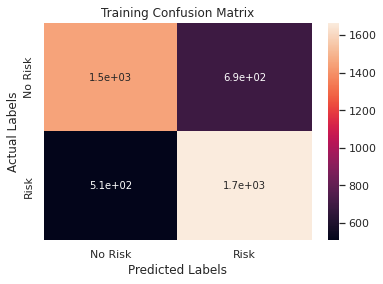

In [109]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_train, xgb_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

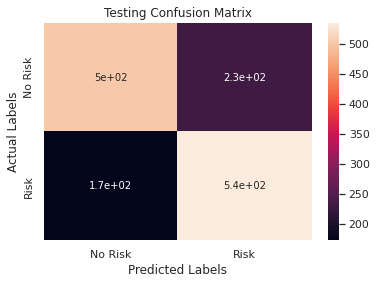

In [110]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(Y_test, xgb_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [111]:
# Getting the XG Boost Classifier Model Interpretability using shap

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

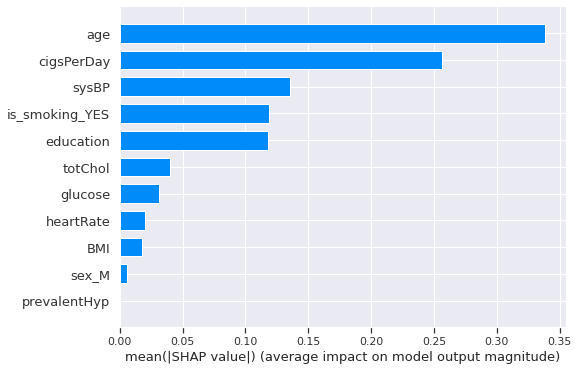

In [112]:
shap.summary_plot(shap_values_xgb, feature_columns, plot_type="bar")

In [113]:
# Printing the results dataframe

results_df

,model_name,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_ROC,test_ROC,train_f1,test_f1
0,Random Forest Classifier,1.0,0.88,1.0,0.89,1.0,0.88,1.0,0.88,1.0,0.88
1,Gradient Boosting Classifier,1.0,0.87,1.0,0.84,1.0,0.88,1.0,0.87,1.0,0.86
2,XG Boost Classifier,0.72,0.72,0.77,0.76,0.71,0.7,0.72,0.72,0.73,0.73
